In [64]:
class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.x_dim = x_dim   # Represents the number of rows in the grid
        self.y_dim = y_dim   # Represents the number of columns in the grid
        # Initialize the grid as an empty list
        self.life_grid = []

         # Create a 2D grid with all cells initialized to 0 (dead)
        for i in range(x_dim):
            row = [0] * y_dim
            self.life_grid.append(row)

    def get_grid(self):
        # Implement a getter method for your grid.
        return self.life_grid

    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                print(self.life_grid[i][j], end=' | ')
            print()    
            print('- - '*self.y_dim)
            
    def populate_grid(self, coord):
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for x, y in coord:
            if 0 <= x < self.x_dim and 0 <= y < self.y_dim:
                self.life_grid[x][y] = 1
            else:
                print(f"Warning: Coordinate ({x}, {y}) is out of bounds for the grid size {self.x_dim}x{self.y_dim}.")

    def make_step(self):
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        self.sum_grid = []       # Initialize a sum grid to keep track of live neighbors
        for i in range(self.x_dim):
           self.sum_grid.append([0] * self.y_dim)  
        live_neighbors = 0

        # Loop through each cell in the grid
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                # Count the number of live neighbors
                sum = 0
                # Check the 8 neighbors around the cell (i, j)
                for x in range(max(0, i-1), min(self.x_dim, i+2)):
                    for y in range(max(0, j-1), min(self.y_dim, j+2)):
                        if (x != i or y != j) :
                            sum += self.life_grid[x][y]

                # Store the sum of live neighbors in the sum_grid
                self.sum_grid[i][j] = sum

        # Apply the rules of the Game of Life
        for i in range(self.x_dim):
            for j in range(self.y_dim):

                # If the cell is dead and has exactly 3 live neighbors, it becomes alive
                # If the cell is alive and has fewer than 2 or more than 3 live neighbors, it dies
                if self.life_grid[i][j] == 1: # If the cell is alive
                    if self.sum_grid[i][j] < 2 or self.sum_grid[i][j] > 3:
                        self.life_grid[i][j] = 0
                else :
                    if self.sum_grid[i][j] == 3:
                        self.life_grid[i][j] = 1    
       
        return self.life_grid 
    
    def make_n_steps(self, n):
        # Implement a method that applies the make_step method n times.
        for i in range(n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        # Draw the current state of the grid.

        import matplotlib.pyplot as plt

        x = []
        y = []
        c = []

        for i in range(self.x_dim):
            for j in range(self.y_dim):
                x.append(j)
                y.append(i)
                c.append(self.life_grid[i][j])

        fig, ax = plt.subplots(figsize=(6, 6))
        scatter = ax.scatter(x, y, c=c, cmap='binary', s=200, edgecolors='black', marker='s')

        ax.set_xlim(-0.5, self.y_dim - 0.5)
        ax.set_ylim(-0.5, self.x_dim - 0.5)
        ax.set_aspect('equal')
        ax.invert_yaxis()

        plt.title("Conway's Game of Life")
        plt.show()


In [65]:
game = GameOfLife(6, 6)
game.populate_grid([
    (1, 2), (1, 3), (1, 4),
    (2, 1), (2, 2), (2, 3)
]) 

game.print_grid()

0 | 0 | 0 | 0 | 0 | 0 | 
- - - - - - - - - - - - 
0 | 0 | 1 | 1 | 1 | 0 | 
- - - - - - - - - - - - 
0 | 1 | 1 | 1 | 0 | 0 | 
- - - - - - - - - - - - 
0 | 0 | 0 | 0 | 0 | 0 | 
- - - - - - - - - - - - 
0 | 0 | 0 | 0 | 0 | 0 | 
- - - - - - - - - - - - 
0 | 0 | 0 | 0 | 0 | 0 | 
- - - - - - - - - - - - 


In [66]:
game.make_n_steps(1)

[[0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

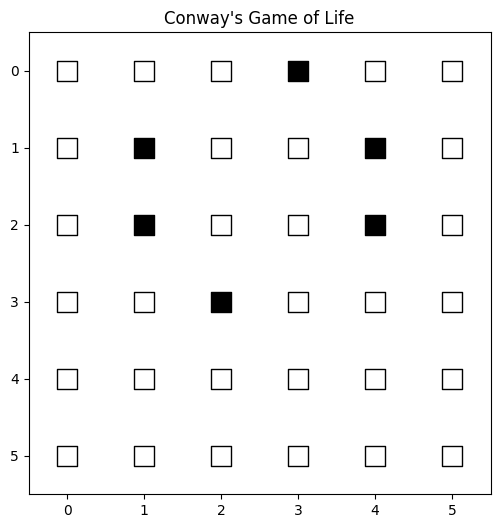

In [67]:
game.draw_grid()